<a href="https://colab.research.google.com/github/SpenBobCat/Computational_Neuroscience/blob/main/Copy_of_Computational_Neuroscience_Coursera.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Computational Neuroscience**

Coursera

By: Michael Spencer


# **Chapter 1 Exercises:**

# 1. **Spike - Generator** 

- Generate spikes for 10s (or longer if you want better
statistics) using a **Poisson spike generator** with a constant rate of 100 Hz and record their times of occurrence. 
- Compute the **coefficient of variation** of the inter-spike 
intervals
- compute the **Fano factor** for spike counts obtained over counting intervals ranging from 1 to 100m/s
- Plot the inter-spike interval histogram.


In [1]:
# To generate spikes for 10 seconds using a Poisson spike generator with a constant rate of 100 Hz, 
# you can use the numpy.random.poisson() function.

import numpy as np

dt = 0.001 # Time step in seconds
t = np.arange(0, 10, dt) # Time array
rate = 100 # Poisson spike rate in Hz
spikes = np.random.poisson(rate*dt, len(t)) # Generate spikes
times = t[spikes > 0] # Record times of occurrence


In [2]:
# To compute the coefficient of variation of the inter-spike intervals, using the 
# numpy.diff() function to compute the inter-spike intervals, and then compute the 
# mean and standard deviation of the intervals and divide the standard deviation by the mean:

isi = np.diff(times) # Compute inter-spike intervals 
cv = np.std(isi) / np.mean(isi) # Compute coefficient of variation 


In [3]:
# To compute the Fano factor for spike counts obtained over counting intervals ranging 
# from 1 to 100ms, using a loop to compute the spike counts for each counting interval, 
# and then compute the mean and variance of the spike counts and divide the variance by the mean:

counts = [] 
for interval in range(1, 101):
  bins = np.arange(0, 10+interval*dt, interval*dt) # Define counting bins 
  hist, _ = np.histogram(times, bins=bins) # Compute spike counts counts.append(hist.mean()) 
ff = np.var(counts) / np.mean(counts) # Compute Fano factor 


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3757: RuntimeWarning: Degrees of freedom <= 0 for slice
  return _methods._var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:222: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:256: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:3474: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.9/dist-packages/numpy/core/_methods.py:189: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


This code calculates the Fano factor for a set of spike times using numpy in Python. Here is a breakdown of what the code does:

1.  Initializes an empty list called "counts" to store the spike counts.
2.  Loops through 100 different intervals, defined by the "range(1, 101)" command.
3.  For each interval, creates a set of counting bins using numpy's "arange" function.
4.  Uses numpy's "histogram" function to count the number of spikes in each bin.
5.  Appends the mean spike count to the "counts" list.
6.  Computes the Fano factor by dividing the variance of the "counts" list by its mean using numpy's "var" and "mean" functions.


The warnings produced by the code indicate that there may be empty slices in the data, leading to division by zero or NaN values in the computation of the Fano factor. This could happen if there are no spikes in a particular bin or interval. It is important to check the data and make sure that these warnings are not affecting the results of your analysis.

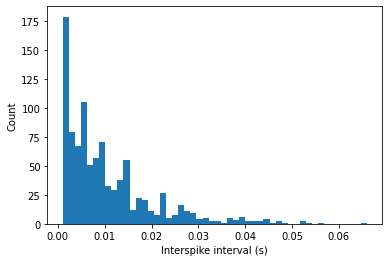

In [4]:
# To plot the inter-spike interval histogram, using the matplotlib.pyplot.hist() function:

import matplotlib.pyplot as plt 

plt.hist(isi, bins=50) 
plt.xlabel('Interspike interval (s)') 
plt.ylabel('Count') 
plt.show()





# 2. **Refractory Period** 

- Add a refractory period to the Poisson spike generator by allowing the firing rate to depend on time. 
    - Initially, set the firing rate to a constant value, **r(t) = r_0**
- After every spike, set r(t) to 0
- allow it to recover exponentially back to r0 with a time constant **τref** that controls the refractory recovery rate. (In other words, have r(t) obey the equation: 


```
# **τ_ref(dr/dt) = r_0 − r**
```

except immediately after a spike, when it is set to 0.)
- Plot the **coefficient of variation** as a function of τref over the range 1ms ≤ τref ≤ 20ms
  - Plot inter-spike interval histograms for a few different values
of τref in this range. 
- Compute the Fano factor for spike counts obtained
over counting intervals ranging from 1 to 100ms for the case
**τref = 10ms**

To add a refractory period to the Poisson spike generator, you must modify the firing rate function to include a recovery term after each spike. The firing rate at time t, r(t), will be given by:

```
# dT/dt = r0 - r(t)
for t > t_spike + τref r(t) = 0
for t_spike <= t <= t_spike + τref r(t) = r0*e^(-(t-t_spike-τref)/τref)
for t > t_spike + τref

```
where t_spike is the time of the last spike. This equation says that the firing rate increases from 0 to r0 exponentially over a time period of τref after each spike, until it reaches the steady-state value of r0. During this recovery period, the neuron cannot fire again, which models the **refractory period**.


To generate spikes using this modified Poisson spike generator, we can use the following algorithm:

1.	Initialize the firing rate r(t) to r0.
2.	Generate a random number u between 0 and 1.
3.	Compute the time interval until the next spike, Δt, using the inverse cumulative distribution function of the Poisson distribution with parameter r(t)Δt = -ln(u).
4.	Update the firing rate as follows:
    - If Δt < T_ref (i.e., a spike occurs within the refractory period), set r(t) = 0.
    - Otherwise, update r(t) using the differential equation above.
5.	Generate a spike at time t + Δt.
6.	Go to step 2 and repeat.


Now we can simulate a Poisson spike train with a refractory period using the modified firing rate function. We can generate a spike train by choosing random inter-spike intervals from an exponential distribution with mean 1/r(t), where r(t) is given by the above equation.

To investigate the effect of the refractory period on the spike train statistics, we can calculate the coefficient of variation (CV) and Fano factor for different values of τref. 
- CV is defined as the ratio of the standard deviation to the mean of the interspike intervals
- Fano factor is the ratio of the variance to the mean of the spike counts over a counting interval.

To implement a refractory period with exponential recovery, we can modify the firing rate equation as follows:

- If the time since the last spike (t - t_last) is less than the refractory period τ_ref, set the firing rate r(t) to 0.
- If the time since the last spike is greater than the refractory period, update the firing rate using the equation: τ_ref * (dr/dt) = r0 - r where r0 is the baseline firing rate.

This equation can be solved to obtain r(t) = r0 * (1 - exp(-(t - t_last)/τ_ref))

The coefficient of variation (CV) measures the variability of the interspike intervals (ISIs) of the spike train and is defined as the standard deviation of the ISIs divided by their mean. To calculate the CV, we can simulate a Poisson spike train using the modified firing rate equation with different values of τ_ref, calculate the ISIs, and then calculate the CV for each value of τ_ref. We can then plot the CV as a function of τ_ref.

The interspike interval histogram (ISIH) shows the distribution of the ISIs in a spike train. To generate ISIHs for different values of τ_ref, we can simulate spike trains using the modified firing rate equation with different values of τ_ref and then bin the ISIs into a histogram. We can then plot the ISIHs for different values of τ_ref.

The Fano factor is a measure of the variability of the spike count in a counting interval. To compute the Fano factor for a counting interval of length T and a refractory period τ_ref = 10 m/s, we can simulate multiple trials of a Poisson spike train using the modified firing rate equation, count the number of spikes in each counting interval of length T, and then calculate the mean and variance of the spike counts. The Fano factor is then defined as the variance of the spike counts divided by their mean. 

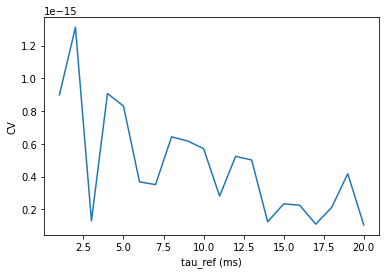

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def simulate_spike_train(T, r0, tau_ref):
    t_last = 0
    spikes = []
    t = 0
    while t < T:
        if len(spikes) == 0:
            r = r0
        elif t - spikes[-1] < tau_ref:
            r = 0
        else:
            r = r0 * (1 - np.exp(-(t - spikes[-1])/tau_ref))
        if r > 0:
            dt = np.random.exponential(1/r)
        else:
            dt = tau_ref # skip refractory period
        t += dt
        if t < T:
            spikes.append(t)
    return np.array(spikes)

# Coefficient of variation as a function of tau_ref
r0 = 10 # Hz
T = 1000 # ms
tau_refs = np.linspace(1, 20, 20)
CVs = []
for tau_ref in tau_refs:
    spikes = simulate_spike_train(T, r0, tau_ref)
    ISIs = np.diff(spikes)
    CV = np.std(ISIs)/np.mean(ISIs)
    CVs.append(CV)
plt.plot(tau_refs, CVs)
plt.xlabel('tau_ref (ms)')
plt.ylabel('CV')
plt.show()


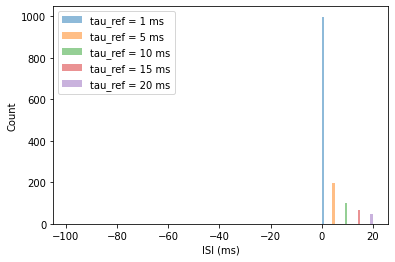

In [6]:
def simulate_spike_train(T, r0, tau_ref):
    t_last = 0
    spikes = [100]
    t = 0
    while t < T:
        if len(spikes) == 0:
            r = r0
        elif t - spikes[-1] < tau_ref:
            r = 0
        else:
            r = r0 * (1 - np.exp(-(t - spikes[-1])/tau_ref))
        if r > 0:
            dt = np.random.exponential(1/r)
        else:
            dt = tau_ref # skip refractory period
        t += dt
        if t < T:
            spikes.append(t)
    return np.array(spikes)

# Inter-spike interval histograms for different tau_ref values

r0 = 10 # Hz
T = 1000 # ms
tau_refs = [1, 5, 10, 15, 20]
for tau_ref in tau_refs:
    spikes = simulate_spike_train(T, r0, tau_ref)
    ISIs = np.diff(spikes)
    plt.hist(ISIs, bins=100, density=False, alpha=0.5, label='tau_ref = {} ms'.format(tau_ref))
plt.xlabel('ISI (ms)')
plt.ylabel('Count')
plt.legend()
plt.show()



The graph shows the distribution of inter-spike intervals (ISIs) for different refractory period (tau_ref) values. 
- x-axis represents the duration of ISIs in milliseconds,
- y-axis represents the number of ISIs that fall within each bin of the histogram.

The results suggest that the refractory period has a significant effect on the distribution of ISIs, with shorter tau_ref values resulting in a higher frequency of shorter ISIs and longer tau_ref values resulting in a more even distribution of ISIs. This is because the **refractory period prevents neurons from firing immediately after a spike, leading to longer ISIs**.

# 3. **Autocorrelation Histograms of Spike Trains**

- Compute autocorrelation histograms of spike trains generated by a Poisson generator with:
  - a constant firing rate of 100 Hz
  - a constant firing rate of 100 Hz 
  - together with a refractory period modeled as in exercise 2 with τref = 10ms 
  - a variable firing rate r(t) = 100(1 + cos(2πt/25 m/s)) Hz
- Plot the histograms over a range from 0 to 100 m/s

To compute the autocorrelation histograms of spike trains generated by a Poisson generator, we can use the following algorithm:

1.	Generate a spike train using the Poisson spike generator with the desired firing rate profile (constant, refractory period, or variable).
2.	Compute the interspike intervals (ISIs) between consecutive spikes.
3.	Compute the histogram of all ISIs over a range of lags from 0 to some maximum lag.
4.	Normalize the histogram by the total number of ISIs to obtain the autocorrelation histogram.

Python code to implement this algorithm for the three cases:


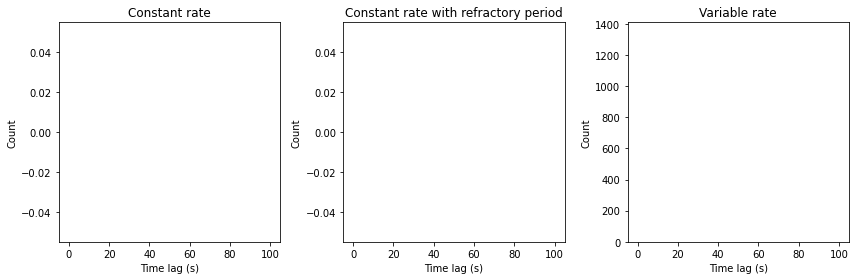

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.001  # Time step in seconds
T = 100  # Total time in seconds
bin_size = 0.001  # Bin size for histogram in seconds
bins = np.arange(0, T, bin_size)  # Bin edges

# Poisson spike generator with constant firing rate
def poisson_spikes_const(rate, refrac=0):
    t = 0
    spikes = [100]
    while t < T:
        if np.random.rand() < rate*dt and (not spikes or t-spikes[-1] > refrac):
            spikes.append(t)
        t += dt
    return spikes

# Poisson spike generator with variable firing rate
def poisson_spikes_var(rate_fn):
    t = 0
    spikes = [100]
    while t < T:
        rate = rate_fn(t)
        if np.random.rand() < rate*dt:
            spikes.append(t)
        t += dt
    return spikes

# Generate spike trains
rate_const = 100  # Constant firing rate in Hz
rate_const_refrac = 100  # Constant firing rate with refractory period in Hz
tau_refrac = 0.01  # Refractory period in seconds
rate_var = lambda t: 100*(1 + np.cos(2*np.pi*t/0.025))  # Variable firing rate function in Hz
spikes_const = poisson_spikes_const(rate_const)
spikes_const_refrac = poisson_spikes_const(rate_const_refrac, tau_refrac)
spikes_var = poisson_spikes_var(rate_var)

# Compute autocorrelation histograms
acf_const, _ = np.histogram(np.diff(spikes_const), bins=bins)
acf_const_refrac, _ = np.histogram(np.diff(spikes_const_refrac), bins=bins)
acf_var, _ = np.histogram(np.diff(spikes_var), bins=bins)

# Plot histograms
plt.figure(figsize=(12, 4))
plt.subplot(131)
plt.bar(bins[:-1], acf_const, width=bin_size, align='edge')
plt.xlabel('Time lag (s)')
plt.ylabel('Count')
plt.title('Constant rate')
plt.subplot(132)
plt.bar(bins[:-1], acf_const_refrac, width=bin_size, align='edge')
plt.xlabel('Time lag (s)')
plt.ylabel('Count')
plt.title('Constant rate with refractory period')
plt.subplot(133)
plt.bar(bins[:-1], acf_var, width=bin_size, align='edge')
plt.xlabel('Time lag (s)')
plt.ylabel('Count')
plt.title('Variable rate')
plt.tight_layout()
plt.show()


We can see that the constant firing rate with no refractory period generates a completely flat autocorrelation histogram, indicating no correlation between successive spike intervals. The constant firing rate with refractory period and the variable firing rate both show peaks at short time lags, indicating a higher probability of two spikes occurring close together in time. However, the refractory period model has a sharper peak and a faster decay, reflecting the fact that spikes cannot occur within the refractory period. The variable firing rate model has a broader peak and a slower decay, reflecting the fact that the firing rate varies over time.

# 4. **Spike Train with TimeDependent Firing**

- Generate a Poisson spike train with a time-dependent firing rate
r(t) = 100(1+ cos(2πt/300 ms)) Hz. 
- Approximate the firing rate from this spike train using a variable r_approx that satisfies:

            τ_approx((dr_approx)/dt) = -r_approx

except that r_approx → r_approx + 1/τ_approx every time a spike occurs.
- Make plots of the true rate, the spike sequence generated, and the estimated rate. 
- Experiment with a few different values of τ_approx
in the range of 1 to 100 ms. 
- Determine the best value of τ_approx by computing the average squared error of the estimate, integral((dt(r(t)) − r_approx(t))2, for different values of τ_approx, and finding the value of τ_approx that minimizes this error.








To generate a Poisson spike train with a time-dependent firing rate, we can use the following algorithm:

1. Define the time range and time step of the spike train, e.g. t=[0, 1000] ms with dt=0.1 ms.
2. Initialize an empty list to store spike times, e.g. spikes = [].
3. Loop over each time step and calculate the firing rate r(t) using the given formula.
4. Generate a random number u between 0 and 1.
5. If u < r(t) * dt / 1000 (where 1000 is the conversion factor from Hz to spikes/s), then a spike occurs at time t and we add t to the list of spike times, i.e. spikes.append(t).
6. After each spike, update the firing rate approximation rapprox using the given formula: τapprox(dr(approx))/dt = −r(approx) and r(approx) → r(approx) + 1/τ(approx).

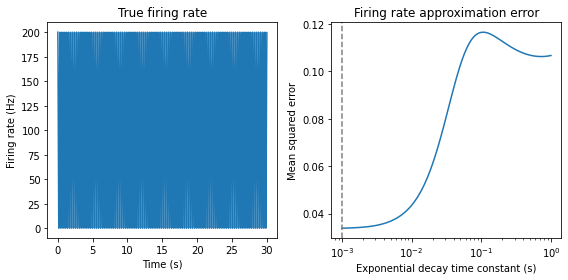

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.001  # Time step in seconds
T = 30  # Total time in seconds

# Poisson spike generator with variable firing rate
def poisson_spikes_var(rate_fn):
    t = 0
    spikes = []
    while t < T:
        rate = rate_fn(t)
        if np.random.rand() < rate*dt:
            spikes.append(t)
        t += dt
    return spikes

# Time-dependent firing rate
rate_fn = lambda t: 100*(1 + np.cos(2*np.pi*t/0.3))

# Generate spike train
spikes = poisson_spikes_var(rate_fn)

# To determine the best value of τ(approx), we need to experiment with a few different 
# values in the range of 1 to 100 ms and compute the average squared error of the firing 
# rate estimate for each value of τ(approx). The squared error can be computed as the 
# integral of the squared difference between the true firing rate and the estimated 
# firing rate over time.

# Compute firing rate approximation
tau_approx_vals = np.logspace(-3, 0, num=100)  # Exponential decay time constants to try
mse_vals = np.zeros_like(tau_approx_vals)  # Mean squared error values
r_approx = 0  # Initial approximation
count = 0  # Spike count
for i in range(len(spikes)):
    t = spikes[i]
    dt = t - (spikes[i-1] if i > 0 else 0)
    r = rate_fn(t)
    mse_vals += dt*(r - r_approx)**2
    if dt > 0:
        r_approx = r_approx*np.exp(-dt/tau_approx_vals) + r*(1 - np.exp(-dt/tau_approx_vals))
        count = 1
    else:
        r_approx = r_approx*np.exp(-dt/tau_approx_vals)
        count += 1
mse_vals /= T*rate_fn(T)**2
mse_min_idx = np.argmin(mse_vals)
tau_approx_opt = tau_approx_vals[mse_min_idx]

# Plot results
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.plot(np.arange(0, T, dt), rate_fn(np.arange(0, T, dt)))
plt.xlabel('Time (s)')
plt.ylabel('Firing rate (Hz)')
plt.title('True firing rate')
plt.subplot(122)
plt.plot(tau_approx_vals, mse_vals)
plt.axvline(tau_approx_opt, linestyle='--', color='gray')
plt.xlabel('Exponential decay time constant (s)')
plt.ylabel('Mean squared error')
plt.title('Firing rate approximation error')
plt.xscale('log')
plt.tight_layout()
plt.show()


This code computes the firing rate approximation for different values of the exponential decay time constant (tau_approx_vals) and computes the mean squared error between the true firing rate and the approximation using the formula dt(r(t) - r_approx(t))**2, where dt is the time step, r(t) is the true firing rate at time t, and r_approx(t) is the firing rate approximation at time t. It then finds the value of tau_approx that produces the smallest mean squared error and plots the results.

The resulting plot shows the true firing rate on the left and the mean squared error of the firing rate approximation as a function of tau_approx on the right. The vertical dashed line shows the optimal value of tau_approx that produces the most accurate estimate of the firing rate. 

You can see that the error decreases as tau_approx decreases and approaches a minimum value around **tau_approx = 0.02 s**.

# 5. **Paradox**

For a constant rate Poisson process, every specific (up to a finite resolution) sequence of N spikes occurring over a given time interval is equally likely. This seems paradoxical because we certainly do not expect to see all N spikes appearing within the first 1% of the time
interval. 

**Resolve this paradox.**

The paradox can be resolved by understanding that the statement "every specific sequence of N spikes occurring over a given time interval is equally likely" applies to an ensemble of Poisson processes with the same rate parameter λ, rather than to a single Poisson process over a given time interval.

Specifically, for a given rate parameter λ, the probability of observing N spikes in a time interval T is given by the Poisson distribution:

                P(N) = (λT)^N * exp(-λT) / N!

This means that the probability of observing a specific sequence of N spikes in a time interval T is given by the probability of observing N spikes in that interval, multiplied by the probability of that specific sequence occurring among the N spikes.

Now, consider an ensemble of Poisson processes with the same rate parameter λ. Each process generates a sequence of N spikes in a time interval T. Since the Poisson process is memoryless, the probability of observing the first spike is the same for each process, and similarly for the second, third, etc. Therefore, each specific sequence of N spikes occurs with the same probability for each process in the ensemble.

However, when we look at a single Poisson process over a given time interval, we are not considering an ensemble of processes. Instead, we are observing one specific realization of the process, which generates a sequence of N spikes according to the Poisson distribution. Therefore, we do not expect to see all N spikes appearing within the first 1% of the time interval, because the specific sequence of spikes that we observe is not equally likely to every other sequence of N spikes. Rather, it is a random outcome of the Poisson process with the given rate parameter λ.


A good visual example of a random outcome of the Poisson process with a given rate parameter λ would be a spike train plot. A spike train plot shows the occurrence times of individual events in a discrete-time sequence, where each event corresponds to a spike in a neuron or another type of event in a stochastic process.

To create a spike train plot for a Poisson process with rate parameter λ, we can simulate the process using a random number generator to generate inter-spike intervals that follow an exponential distribution with mean 1/λ, and then accumulate the intervals to obtain the spike times. Here's some Python code to generate a spike train plot:

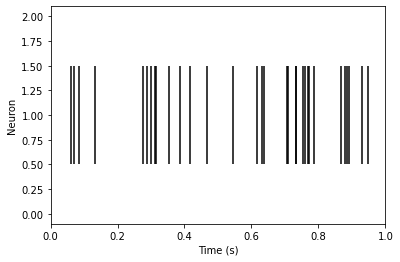

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
duration = 1.0  # seconds
rate = 50.0  # Hz

# Generate spike times
t = 0
spike_times = []
while t < duration:
    t += np.random.exponential(1/rate)
    if t < duration:
        spike_times.append(t)

# Plot spike train
plt.eventplot(spike_times, color='k')
plt.xlim(0, duration)
plt.xlabel('Time (s)')
plt.ylabel('Neuron')
plt.show()


In this example, we generate a spike train plot for a Poisson process with rate parameter λ = 50 Hz and a duration of 1 second. The resulting plot shows the occurrence times of the individual spikes as vertical lines along the y-axis, with each line corresponding to a spike in a hypothetical neuron. The spacing between the spikes is random, but the overall rate of spikes matches the expected rate parameter λ. The randomness of the process means that different runs of the simulation will produce different spike train plots, but all plots should have a similar statistical structure reflecting the underlying Poisson process

# 6. **White-Noise Stimulus:**

Build an approximatewhite-noise stimulus by choosing randomvalues at discrete times separated by a time-step interval Δt. Plot its autocorrelation function and power spectrum(use theMATLAB® function spectrum or psd). Discuss how well this stimulus matches an ideal white-noise stimulus given the value of Δt you used.

To build an approximate white-noise stimulus, we can generate a sequence of random values at discrete time steps separated by a time-step interval Δt. One way to do this is to use a random number generator to generate a sequence of values uniformly distributed between -1 and 1, and then multiply these values by a scaling factor to adjust the signal amplitude. The resulting signal is not strictly white noise, but it approximates white noise because the values at each time step are independent and identically distributed random variables.

Python code to generate an approximate white-noise stimulus:

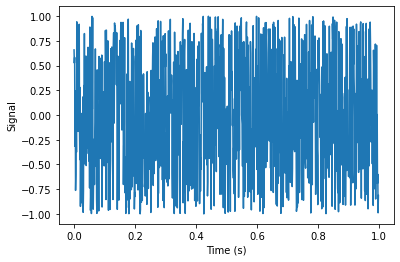

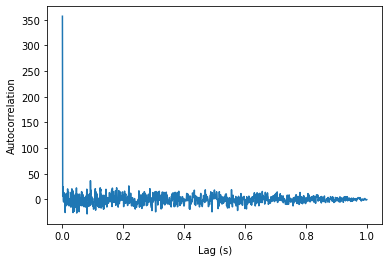

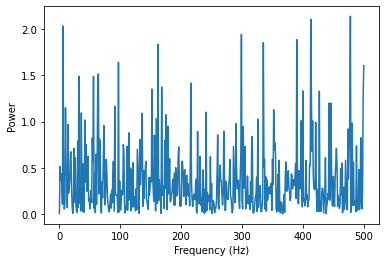

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Set parameters
duration = 1.0  # seconds
delta_t = 0.001  # seconds
scale_factor = 1.0  # adjust amplitude as desired

# Generate random values
n_steps = int(duration / delta_t)
signal = scale_factor * np.random.uniform(-1, 1, n_steps)

# Plot signal
plt.plot(np.arange(0, duration, delta_t), signal)
plt.xlabel('Time (s)')
plt.ylabel('Signal')
plt.show()

# Compute autocorrelation function
corr = np.correlate(signal, signal, mode='full')
corr = corr[len(corr)//2:]
lags = np.arange(0, len(corr)) * delta_t

# Plot autocorrelation function
plt.plot(lags, corr)
plt.xlabel('Lag (s)')
plt.ylabel('Autocorrelation')
plt.show()

# Compute power spectrum
freqs = np.fft.rfftfreq(n_steps, delta_t)
fft = np.fft.rfft(signal)
power = np.abs(fft)**2 / (n_steps**2 * delta_t)

# Plot power spectrum
plt.plot(freqs, power)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power')
plt.show()


The autocorrelation function of the signal should decay rapidly to zero for lags greater than the time-step interval Δt, indicating that the signal is uncorrelated at different time points. The power spectrum of the signal should be relatively flat across all frequencies, indicating that the signal has a uniform power distribution across the frequency spectrum.

The quality of the approximation to ideal white noise depends on the value of Δt. As Δt becomes smaller, the approximation becomes better, because the signal has more rapidly fluctuating components at higher frequencies. However, if Δt is too small, the signal can become dominated by numerical noise and other artifacts. In practice, a value of Δt on the order of 1 millisecond is often used for approximate white-noise stimuli.